In [238]:
import pandas as pd

In [239]:
!wget  -O 'data_3_course.xlsx' -q 'https://www.dropbox.com/s/ysxs5srafoyxknb/_data_3_course.xlsx?dl=1' # выполняем bash команды с восклицательным знаком

In [240]:
!ls

data_3_course.xlsx  sample_data


In [241]:
data = pd.read_excel('data_3_course.xlsx') # Можно читать проприетарный xlsx!

In [242]:
data # первичное представление о данных

,Timestamp,ID,Рейтинг,Группа (в формате 182),МИ?,"Осенний курс по выбору, приоритет 1","Осенний курс по выбору, приоритет 2","Осенний курс по выбору, приоритет 3","Весенний курс по выбору, приоритет 1","Весенний курс по выбору, приоритет 2","Весенний курс по выбору, приоритет 3",Вы заполняете анкету в первый раз?
0,2020-05-15 01:12:50.543,93ff79a51cd602f1dd3028ba2c129503,"704,0",181,NaN,Язык SQL,Высокопроизводительные вычисления,Матричные вычисления,Дискретная оптимизация,Численные методы,Машинное обучение 2,Да
1,2020-05-15 02:46:48.066,26b01b1c4cd5656bab18d24c548834fb,"646,0",181,NaN,Высокопроизводительные вычисления,Безопасность компьютерных систем,Язык SQL,Дискретная оптимизация,Численные методы,Машинное обучение 2,Нет
2,2020-05-15 03:12:41.480,30f3653fc176d54e89ac3179c455c6dd,"624,0",185,NaN,Безопасность компьютерных систем,Матричные вычисления,Моделирование временных рядов,Дискретная оптимизация,Машинное обучение 2,Численные методы,Да
3,2020-05-15 04:43:08.994,1528f0eaa027580820ccf0d92a53ad68,"579,0",182,NaN,Statistical Learning Theory,Высокопроизводительные вычисления,Матричные вычисления,Дискретная оптимизация,Численные методы,Машинное обучение 2,Да
4,2020-05-15 07:47:17.197,496ea4f0d4abe264b1bb1b80eb3830c5,"632,0",183,NaN,Высокопроизводительные вычисления,Безопасность компьютерных систем,Теория баз данных,Компьютерные сети,Дискретная оптимизация,Численные методы,Да
...,...,...,...,...,...,...,...,...,...,...,...,...
218,2020-05-20 11:49:38.801,bd416140ecdb32b6dbd7f40820bf63b1,"517,0",185,NaN,Безопасность компьютерных систем,Теория баз данных,Язык SQL,Машинное обучение 2,Компьютерные сети,Промышленное программирование на языке Java,Да
219,2020-05-20 11:57:07.326,e6f5eb76b34e7ab7bac753e6cb0a2279,"634,0",184,NaN,Теория баз данных,Безопасность компьютерных систем,Моделирование временных рядов,Компьютерные сети,Промышленное программирование на языке Java,Анализ данных в бизнесе,Да
220,2020-05-21 16:33:15.899,1341f488fae5f1ccf164960fd6506cd0,"584,0",188,NaN,Язык SQL,Теория баз данных,Безопасность компьютерных систем,Промышленное программирование на языке Java,Компьютерные сети,Системы баз данных,Да
221,2020-05-24 01:21:31.946,04bcb5c9d23813ffa940e1febb27fadc,"646,0",186,NaN,Теория баз данных,Высокопроизводительные вычисления,Безопасность компьютерных систем,Компьютерные сети,Дискретная оптимизация,Машинное обучение 2,Нет


In [243]:
!wget https://raw.githubusercontent.com/PersDep/german-credit-data/main/german_credit_data_with_risk.csv

--2020-12-02 21:19:46--  https://raw.githubusercontent.com/PersDep/german-credit-data/main/german_credit_data_with_risk.csv
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 151.101.0.133, 151.101.64.133, 151.101.128.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|151.101.0.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 53393 (52K) [text/plain]
Saving to: ‘german_credit_data_with_risk.csv’

german_credit_data_ 100%[===================>]  52.14K  --.-KB/s    in 0.004s  

2020-12-02 21:19:46 (14.2 MB/s) - ‘german_credit_data_with_risk.csv’ saved [53393/53393]



In [244]:
!ls

data_3_course.xlsx  german_credit_data_with_risk.csv  sample_data


In [245]:
df_credit = pd.read_csv('german_credit_data_with_risk.csv', index_col=0) # загружаем данные с помощью pandas

In [246]:
df_credit.info() # обобщенное представление о данных

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1000 entries, 0 to 999
Data columns (total 10 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   Age               1000 non-null   int64 
 1   Sex               1000 non-null   object
 2   Job               1000 non-null   int64 
 3   Housing           1000 non-null   object
 4   Saving accounts   817 non-null    object
 5   Checking account  606 non-null    object
 6   Credit amount     1000 non-null   int64 
 7   Duration          1000 non-null   int64 
 8   Purpose           1000 non-null   object
 9   Risk              1000 non-null   object
dtypes: int64(4), object(6)
memory usage: 85.9+ KB


In [247]:
df_credit.head()

,Age,Sex,Job,Housing,Saving accounts,Checking account,Credit amount,Duration,Purpose,Risk
0,67,male,2,own,NaN,little,1169,6,radio/TV,good
1,22,female,2,own,little,moderate,5951,48,radio/TV,bad
2,49,male,1,own,little,NaN,2096,12,education,good
3,45,male,2,free,little,little,7882,42,furniture/equipment,good
4,53,male,2,free,little,little,4870,24,car,bad


In [248]:
df_credit.shape # строки, столбцы

(1000, 10)

In [249]:
df_credit['Risk'].describe() # описываем столбцы

count     1000
unique       2
top       good
freq       700
Name: Risk, dtype: object

In [250]:
df_credit.describe() # и проводим численный анализ по численным столбцам

,Age,Job,Credit amount,Duration
count,1000.000000,1000.000000,1000.000000,1000.000000
mean,35.546000,1.904000,3271.258000,20.903000
std,11.375469,0.653614,2822.736876,12.058814
min,19.000000,0.000000,250.000000,4.000000
25%,27.000000,2.000000,1365.500000,12.000000
50%,33.000000,2.000000,2319.500000,18.000000
75%,42.000000,2.000000,3972.250000,24.000000
max,75.000000,3.000000,18424.000000,72.000000


In [251]:
df_credit.nunique() # узнаём вариацию значений

Age                  53
Sex                   2
Job                   4
Housing               3
Saving accounts       4
Checking account      3
Credit amount       921
Duration             33
Purpose               8
Risk                  2
dtype: int64

In [252]:
# получаем данные о корреляции возраста и результата
df_good_age = df_credit.loc[df_credit["Risk"] == 'good']['Age'].values.tolist()
df_bad_age = df_credit.loc[df_credit["Risk"] == 'bad']['Age'].values.tolist()
df_age = df_credit['Age'].values.tolist()

In [253]:
import matplotlib
import matplotlib.pyplot as plt

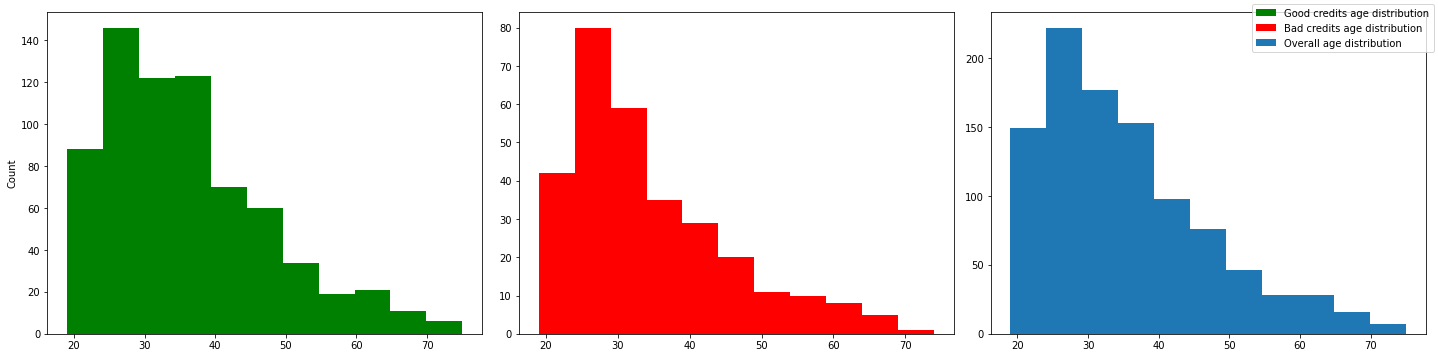

In [254]:
# и рассматриваем на гистограммах
cols = 11
fig, axs = plt.subplots(1, 3, tight_layout=True, figsize=(20, 5))
axs[0].hist(df_good_age, bins=cols, color='green', label='Good credits age distribution')
axs[1].hist(df_bad_age, bins=cols, color='red', label='Bad credits age distribution')
axs[2].hist(df_age, bins=cols, label='Overall age distribution')
axs[0].set_ylabel('Count')
fig.legend(loc='upper right')

(array([149., 262., 177., 155.,  89.,  72.,  42.,  26.,  21.,   7.]),
 array([19. , 24.6, 30.2, 35.8, 41.4, 47. , 52.6, 58.2, 63.8, 69.4, 75. ]),
 <a list of 10 Patch objects>)

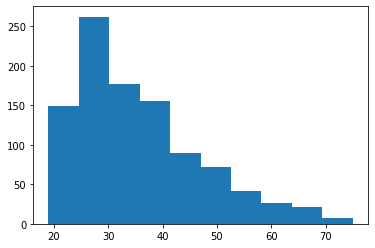

In [255]:
plt.hist(df_age, bins=10)

In [256]:
# категоризируем возраст по интервалам
interval = (18, 25, 35, 50, 65, 90)
labels = ['Student', 'Young', 'Adult', 'Senior', 'Old']
df_credit["Age_cat"] = pd.cut(df_credit.Age, interval, labels=labels)
df_credit.nunique()

Age                  53
Sex                   2
Job                   4
Housing               3
Saving accounts       4
Checking account      3
Credit amount       921
Duration             33
Purpose               8
Risk                  2
Age_cat               5
dtype: int64

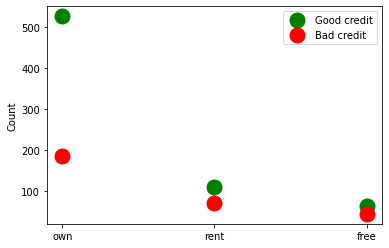

In [257]:
# получаем данные о корреляции проживания и результатов
df_good_housing = df_credit[df_credit["Risk"]== 'good']["Housing"].value_counts()
df_bad_housing = df_credit[df_credit["Risk"]== 'bad']["Housing"].value_counts()
plt.plot(df_good_housing.index.values, df_good_housing.values, color='green', label='Good credit', marker='o', markersize=15, lw=0)
plt.plot(df_bad_housing.index.values, df_bad_housing.values, color='red', label='Bad credit', marker='o', markersize=15, lw=0)
plt.ylabel('Count')
plt.legend(loc='upper right')

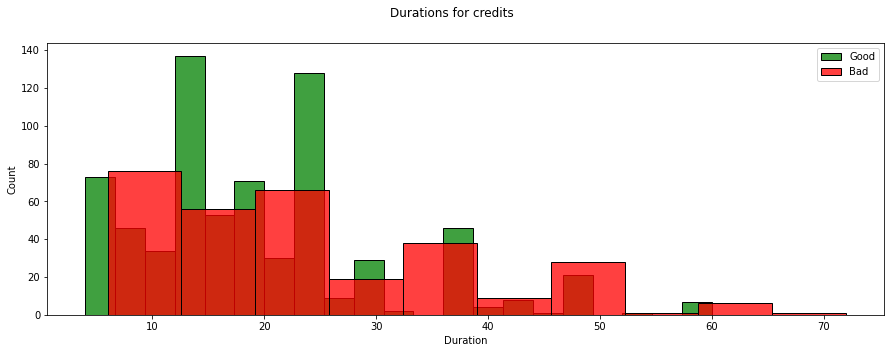

In [258]:
# посмотрим на возможности seaborn с накладывающимися гистограммами
import seaborn as sns

fig = plt.figure(figsize=(15, 5))
sns.histplot(df_credit[df_credit["Risk"]== 'good']["Duration"], color='g', label='Good')
sns.histplot(df_credit[df_credit["Risk"]== 'bad']["Duration"], color='r', label='Bad')
fig.suptitle('Durations for credits')
plt.legend(loc='best')

In [259]:
# заполняем пустующие ячейки размера аккаунтов, теперь у нас нет пустых значений
df_credit['Saving accounts'] = df_credit['Saving accounts'].fillna('no_inf')
df_credit['Checking account'] = df_credit['Checking account'].fillna('no_inf')
df_credit.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1000 entries, 0 to 999
Data columns (total 11 columns):
 #   Column            Non-Null Count  Dtype   
---  ------            --------------  -----   
 0   Age               1000 non-null   int64   
 1   Sex               1000 non-null   object  
 2   Job               1000 non-null   int64   
 3   Housing           1000 non-null   object  
 4   Saving accounts   1000 non-null   object  
 5   Checking account  1000 non-null   object  
 6   Credit amount     1000 non-null   int64   
 7   Duration          1000 non-null   int64   
 8   Purpose           1000 non-null   object  
 9   Risk              1000 non-null   object  
 10  Age_cat           1000 non-null   category
dtypes: category(1), int64(4), object(6)
memory usage: 87.1+ KB


In [260]:
# делаем категории бинарными значениями
df_credit = df_credit.merge(pd.get_dummies(df_credit.Purpose, drop_first=True, prefix='Purpose'), left_index=True, right_index=True)
df_credit = df_credit.merge(pd.get_dummies(df_credit.Sex, drop_first=True, prefix='Sex'), left_index=True, right_index=True)
df_credit = df_credit.merge(pd.get_dummies(df_credit.Housing, drop_first=True, prefix='Housing'), left_index=True, right_index=True)
df_credit = df_credit.merge(pd.get_dummies(df_credit["Saving accounts"], drop_first=True, prefix='Savings'), left_index=True, right_index=True)
df_credit = df_credit.merge(pd.get_dummies(df_credit.Risk, prefix='Risk'), left_index=True, right_index=True)
df_credit = df_credit.merge(pd.get_dummies(df_credit["Checking account"], drop_first=True, prefix='Check'), left_index=True, right_index=True)
df_credit = df_credit.merge(pd.get_dummies(df_credit["Age_cat"], drop_first=True, prefix='Age_cat'), left_index=True, right_index=True)

In [261]:
# удаляем лишнее, размер кредита и продолжительность оставим численными небинарными признаками
del df_credit["Saving accounts"]
del df_credit["Checking account"]
del df_credit["Purpose"]
del df_credit["Sex"]
del df_credit["Housing"]
del df_credit["Age_cat"]
del df_credit["Risk"]
del df_credit['Risk_good']
del df_credit['Age']
df_credit.nunique()

Job                              4
Credit amount                  921
Duration                        33
Purpose_car                      2
Purpose_domestic appliances      2
Purpose_education                2
Purpose_furniture/equipment      2
Purpose_radio/TV                 2
Purpose_repairs                  2
Purpose_vacation/others          2
Sex_male                         2
Housing_own                      2
Housing_rent                     2
Savings_moderate                 2
Savings_no_inf                   2
Savings_quite rich               2
Savings_rich                     2
Risk_bad                         2
Check_moderate                   2
Check_no_inf                     2
Check_rich                       2
Age_cat_Young                    2
Age_cat_Adult                    2
Age_cat_Senior                   2
Age_cat_Old                      2
dtype: int64

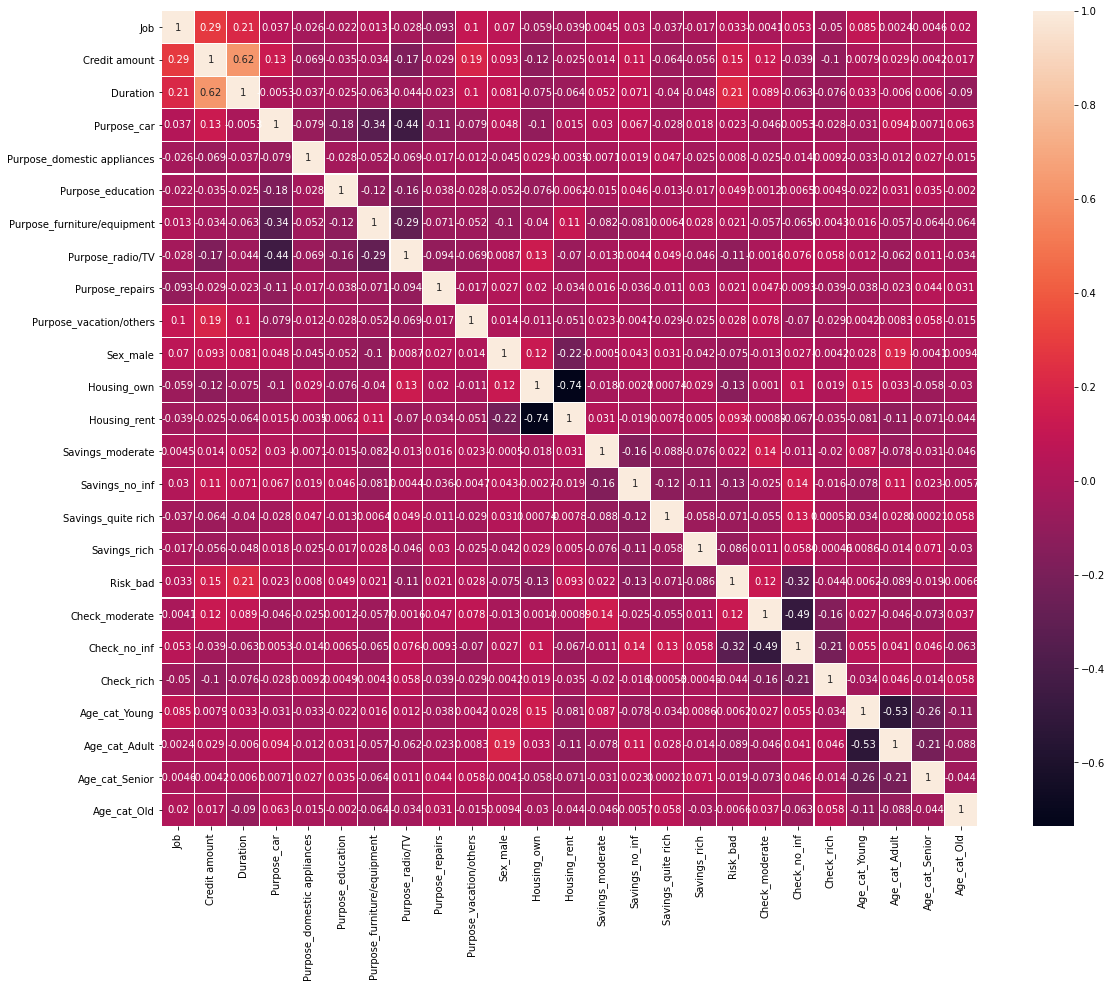

In [262]:
# смотрим на тепловую карту корреляций
plt.figure(figsize=(20, 15))
sns.heatmap(df_credit.astype(float).corr(), linewidths=0.1, vmax=1.0, square=True,  linecolor='white', annot=True)
plt.show()

In [263]:
from sklearn.model_selection import train_test_split # функция для разделения данных
from sklearn.ensemble import RandomForestClassifier # Конструктор модели леса решающих деревьев
from sklearn.metrics import accuracy_score # функция для проверки точности

In [264]:
X = df_credit.drop('Risk_bad', 1).values # доступные признаки
y = df_credit['Risk_bad'].values # целевой признак
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state=10) # Разбиваем на тренировочный и тестовый наборы

In [265]:
model = RandomForestClassifier(max_depth=None, max_features=10, n_estimators=15, random_state=11) # создаём модель (выбор параметров -- отдельная тема)
model.fit(X_train, y_train) # обучаем модель на тренировочном наборе
y_pred = model.predict(X_test) # вычисляемся на тестовом наборе признаков
accuracy_score(y_test, y_pred) # сравниваем с целевыми значениями

0.74